In [1]:
import seaborn as sns
import pandas as pd

In [2]:
df = sns.load_dataset('titanic')

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
# Check missing values

df.isnull()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
887,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,True,False,False,False,False,False,False,False,True,False,False,False
889,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [5]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

<AxesSubplot: >

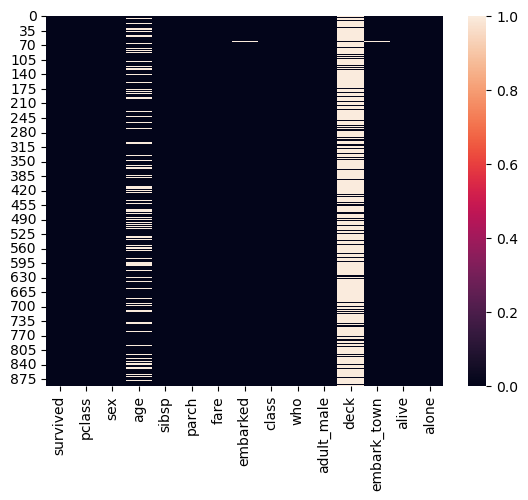

In [6]:
sns.heatmap(df.isnull())

# Handling missing values

**Row-wise deletion**

In [7]:
df.shape

(891, 15)

In [8]:
df.dropna().shape

(182, 15)

**Column-wise deletion**

In [9]:
df.dropna(axis=1).shape

(891, 11)

## Imputation

**Mean Imputation**: This technique works well when our data is normally distributed

/tmp/ipykernel_2052/2409177837.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.age)


<AxesSubplot: xlabel='age', ylabel='Density'>

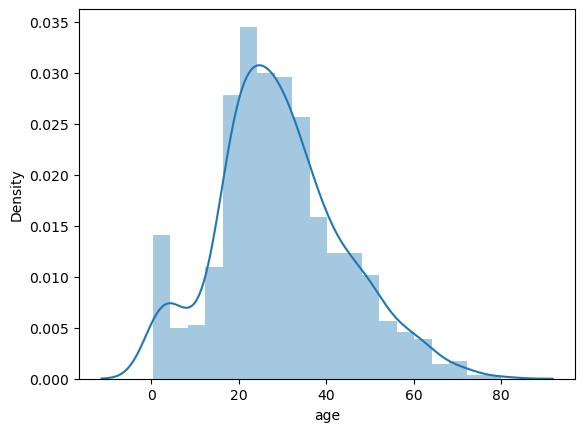

In [10]:
sns.distplot(df.age)

In [11]:
df.age.isnull().sum()

177

In [12]:
df['Age_mean']=df['age'].fillna(df['age'].mean())
df['Age_mean']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age_mean, Length: 891, dtype: float64

**Median Imputation:** If our data is skewed and has outliers

In [13]:
df['Age_median']=df['age'].fillna(df['age'].median())
df['Age_median']

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: Age_median, Length: 891, dtype: float64

In [14]:
df[['age','Age_mean','Age_median']]

,age,Age_mean,Age_median
0,22.0,22.000000,22.0
1,38.0,38.000000,38.0
2,26.0,26.000000,26.0
3,35.0,35.000000,35.0
4,35.0,35.000000,35.0
...,...,...,...
886,27.0,27.000000,27.0
887,19.0,19.000000,19.0
888,NaN,29.699118,28.0
889,26.0,26.000000,26.0


**Mode Imputation:** mostly used for imputing categorical feautres

In [15]:
df[df['embarked'].isnull()]

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone,Age_mean,Age_median
61,1,1,female,38.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,38.0,38.0
829,1,1,female,62.0,0,0,80.0,NaN,First,woman,False,B,NaN,yes,True,62.0,62.0


In [16]:
df['embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [17]:
df[df['age'].notna()]['embarked'].mode()

0    S
Name: embarked, dtype: object

In [18]:
df[df['age'].notna()]['embarked'].mode()[0]

'S'

In [19]:
mode = df[df['age'].notna()]['embarked'].mode()[0]

In [20]:
df['embarked_mode']=df['embarked'].fillna(mode)

In [21]:
df[['embarked_mode', 'embarked']]

,embarked_mode,embarked
0,S,S
1,C,C
2,S,S
3,S,S
4,S,S
...,...,...
886,S,S
887,S,S
888,S,S
889,C,C


In [22]:
df.embarked.isnull().sum()

2

In [23]:
df.embarked_mode.isnull().sum()

0

# Handling Imbalanced Data

**Generating imbalanced Data:**

In [24]:
import numpy as np
import pandas as pd

np.random.seed(123)

n_samples=1000
class_0_ratio=0.9
n_class_0=int(n_samples*class_0_ratio)
n_class_1=n_samples-n_class_0

In [25]:
class_0=pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale=1, size=n_class_0),
    'feature_2': np.random.normal(loc=0, scale=1, size=n_class_0),
    'target': [0]*n_class_0
})

class_1=pd.DataFrame({
    'feature_1': np.random.normal(loc=2, scale=1, size=n_class_1),
    'feature_2': np.random.normal(loc=2, scale=1, size=n_class_1),
    'target': [1]*n_class_1
})

In [26]:
class_0

,feature_1,feature_2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0
...,...,...,...
895,0.238761,-0.003155,0
896,-1.106386,-0.430660,0
897,0.366732,-0.146416,0
898,1.023906,1.160176,0


In [27]:
class_1

,feature_1,feature_2,target
0,1.699768,2.139033,1
1,1.367739,2.025577,1
2,1.795683,1.803557,1
3,2.213696,3.312255,1
4,3.033878,3.187417,1
...,...,...,...
95,1.376371,2.845701,1
96,2.239810,0.880077,1
97,1.131760,1.640703,1
98,2.902006,0.390305,1


In [28]:
df=pd.concat([class_0,class_1]).reset_index(drop=True)

In [29]:
df.head()

,feature_1,feature_2,target
0,-1.085631,0.551302,0
1,0.997345,0.419589,0
2,0.282978,1.815652,0
3,-1.506295,-0.252750,0
4,-0.578600,-0.292004,0


In [30]:
df.target.value_counts()

0    900
1    100
Name: target, dtype: int64

**Upsampling:**

In [31]:
df_minority=df[df['target']==1]
df_majority=df[df['target']==0]

In [32]:
##upsampling
from sklearn.utils import resample

df_minority_upsample=resample(df_minority,
                              replace=True, # sample with replacement
                              n_samples = len(df_majority),
                              random_state=42
                             )

In [33]:
df_minority_upsample.shape

(900, 3)

In [34]:
df_minority.shape

(100, 3)

In [35]:
df_minority_upsample.target.value_counts()

1    900
Name: target, dtype: int64

In [36]:
df_upsampled = pd.concat([df_majority,df_minority_upsample])

In [37]:
df_upsampled.target.value_counts()

0    900
1    900
Name: target, dtype: int64

In [38]:
df_upsampled.shape

(1800, 3)

**Downsampling:**

In [39]:
class_0=pd.DataFrame({
    'feature_1': np.random.normal(loc=0, scale=1, size=n_class_0),
    'feature_2': np.random.normal(loc=0, scale=1, size=n_class_0),
    'target': [0]*n_class_0
})

class_1=pd.DataFrame({
    'feature_1': np.random.normal(loc=2, scale=1, size=n_class_1),
    'feature_2': np.random.normal(loc=2, scale=1, size=n_class_1),
    'target': [1]*n_class_1
})

In [40]:
df=pd.concat([class_0,class_1]).reset_index(drop=True)

In [41]:
df_minority=df[df['target']==1]
df_majority=df[df['target']==0]

In [42]:
##upsampling
from sklearn.utils import resample

df_majority_downsample=resample(df_majority,
                              replace=False, # sample whithout replacement
                              n_samples = len(df_minority),
                              random_state=42
                             )

In [43]:
df_majority_downsample.shape

(100, 3)

In [44]:
df_downsampled=pd.concat([df_minority,df_majority_downsample])

In [45]:
df_downsampled.target.value_counts()

1    100
0    100
Name: target, dtype: int64

**SMOTE (Synthetic Minority Oversampling Technique):**

In [46]:
from sklearn.datasets import make_classification

In [47]:
#generating imbalanced dependent and independent features
X,y=make_classification(n_samples=1000, n_features=2, n_redundant=0,n_clusters_per_class=1, weights=[0.90], random_state=1)

In [48]:
X

array([[ 1.53682958, -1.39869399],
       [ 1.55110839,  1.81032905],
       [ 1.29361936,  1.01094607],
       ...,
       [-0.55662536, -0.15983725],
       [ 1.00499902,  0.93628981],
       [ 1.46210987,  1.14497791]])

In [49]:
y

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [50]:
import pandas as pd
df1=pd.DataFrame(X, columns=['f1','f2'])
df2=pd.DataFrame(y, columns=['target'])
final_df=pd.concat([df1,df2], axis=1)

In [51]:
final_df.head()

,f1,f2,target
0,1.536830,-1.398694,1
1,1.551108,1.810329,0
2,1.293619,1.010946,0
3,1.119889,1.632518,0
4,1.042356,1.121529,0


In [52]:
final_df.target.value_counts()

0    894
1    106
Name: target, dtype: int64

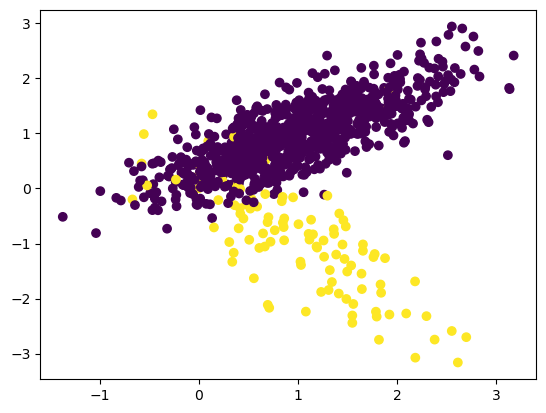

In [53]:
import matplotlib.pyplot as plt

plt.scatter(final_df['f1'], final_df['f2'],c=final_df['target'])

In [54]:
!pip install imblearn

In [55]:
from imblearn.over_sampling import SMOTE

In [56]:
#transform data
oversample=SMOTE()
X,y=oversample.fit_resample(final_df[['f1','f2']], final_df['target'])

In [57]:
X.shape

(1788, 2)

In [58]:
len(y[y==0])

894

In [59]:
len(y[y==1])

894

In [60]:
df1=pd.DataFrame(X, columns=['f1','f2'])
df2=pd.DataFrame(y, columns=['target'])
oversampled_df=pd.concat([df1,df2], axis=1)

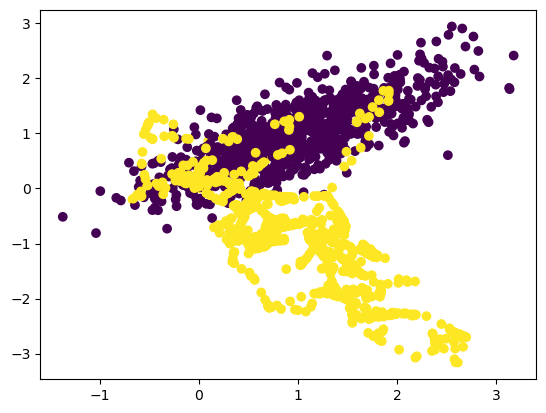

In [61]:
plt.scatter(oversampled_df['f1'], oversampled_df['f2'],c=oversampled_df['target'])

**Data Interpolation:**
>1. Linear Interpolation:

In [62]:
import numpy as np
x=np.array([1,2,3,4,5])
y=np.array([2,4,6,8,10])

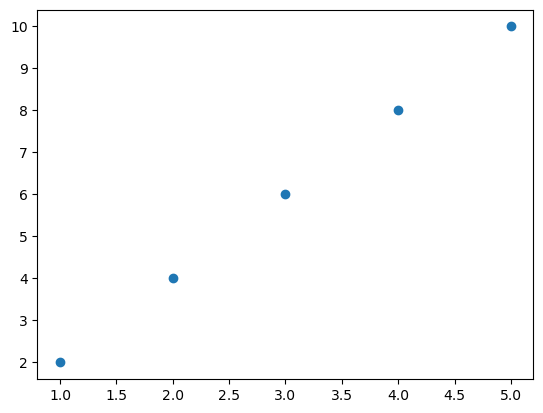

In [63]:
import matplotlib.pyplot as plt
plt.scatter(x,y)

In [64]:
#interpolate the data using linear interpolation
x_new=np.linspace(1,5,10) #create new x values
y_interp=np.interp(x_new,x,y) #interpolate y variable
print(y_interp)

[ 2.          2.88888889  3.77777778  4.66666667  5.55555556  6.44444444
  7.33333333  8.22222222  9.11111111 10.        ]


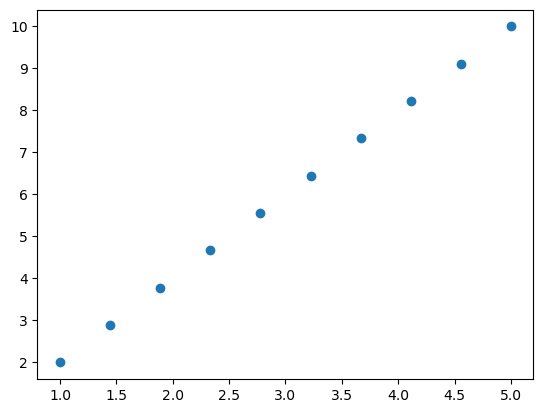

In [65]:
plt.scatter(x_new, y_interp)

>2. Cubic Interpolation

In [66]:
import numpy as np
x=np.array([1,2,3,4,5])
y=np.array([1,8,27,64,125])

In [67]:
from scipy.interpolate import interp1d

In [68]:
#create a cubic interpolation function
f=interp1d(x,y,kind='cubic')

In [69]:
x_new = np.linspace(1,5,10)
y_interp=f(x_new)
print(y_interp)

[  1.           3.01371742   6.739369    12.7037037   21.43347051
  33.45541838  49.2962963   69.48285322  94.54183813 125.        ]


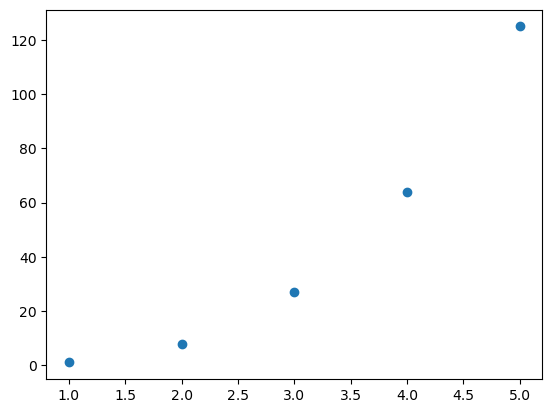

In [70]:
plt.scatter(x,y)

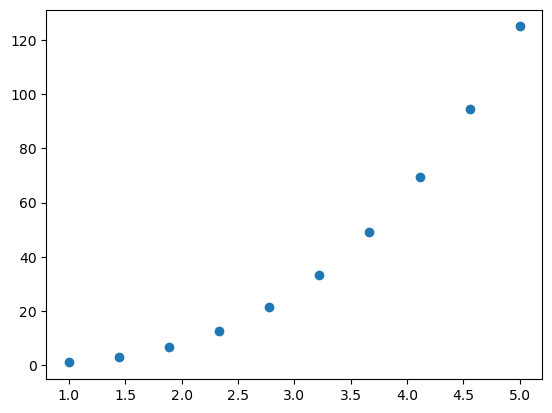

In [71]:
plt.scatter(x_new,y_interp)

>3. Polynomial Interpolation

In [72]:
import numpy as np
x=np.array([1,2,3,4,5])
y=np.array([1,4,9,16,25])

In [73]:
# interpolate data using polynovial interpolation
p = np.polyfit(x,y,2) # fit a 2nd degree polynomial to the data

In [74]:
x_new = np.linspace(1,5,10) #create new x values
y_interp = np.polyval(p,x_new) #interpolate y values

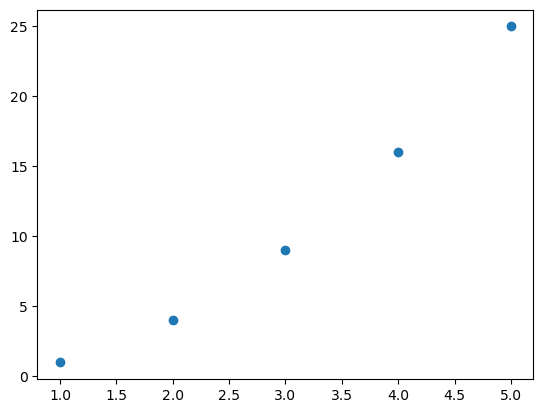

In [75]:
plt.scatter(x,y)

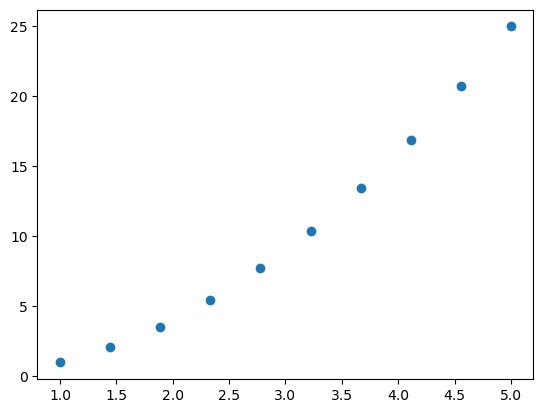

In [76]:
plt.scatter(x_new, y_interp)

# Handling Outliers:
**5 Number Summary:**
>1. Minimum Value<br>2. Q1- 25 percentile<br>3. Median<br>4. Q3- 75 percentile<br>5. Maximum

In [77]:
import numpy as np
lst_marks=[45,32,56,75,89,54,32,89,90,87,67,54,45,98,99,67,74,1000,1100]

In [78]:
Q1=np.percentile(lst_marks,[25])
print(Q1)

[54.]


In [79]:
minimum,Q1,Q2,Q3,maximum = np.quantile(lst_marks,[0,0.25,0.50,0.75,1.0])

In [80]:
IQR = Q3-Q1
print(IQR)

35.5


In [81]:
lower_fence = Q1-1.5*(IQR)
higher_fence = Q3+1.5*(IQR)

In [82]:
lower_fence, higher_fence

(0.75, 142.75)

anything below lower fence and above higher fence will be considered outliers

In [83]:
outliers=[]
for i in lst_marks:
    if i>=0.75 and i<=142.75:
        print("This element is not an outlier")
    else:
        outliers.append(i)

This element is not an outlier
This element is not an outlier
This element is not an outlier
This element is not an outlier
This element is not an outlier
This element is not an outlier
This element is not an outlier
This element is not an outlier
This element is not an outlier
This element is not an outlier
This element is not an outlier
This element is not an outlier
This element is not an outlier
This element is not an outlier
This element is not an outlier
This element is not an outlier
This element is not an outlier


In [84]:
outliers

[1000, 1100]

**Boxplot**

In [85]:
import seaborn as sns

<AxesSubplot: >

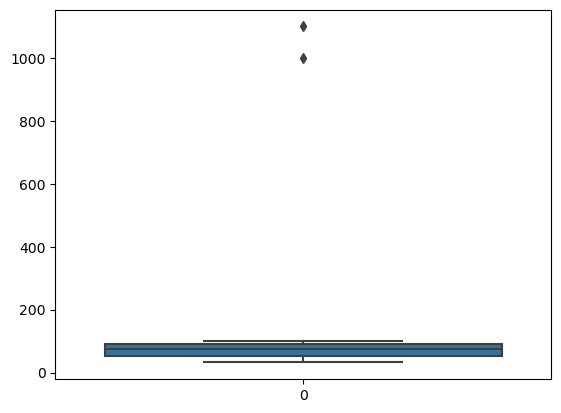

In [86]:
sns.boxplot(lst_marks)